In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread("dog.jpg")

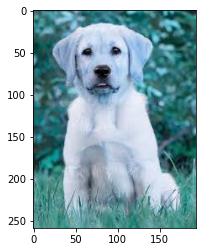

In [5]:
plt.imshow(img)

# Brightening & Darkening Images

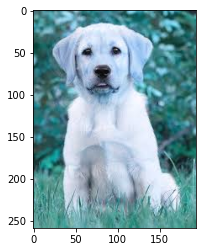

In [38]:
image_bright = cv2.add(img, np.array([10.0]))
plt.imshow(image_bright)

image (x, y) = image (x, y) + brightness

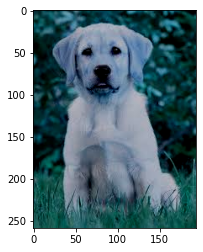

In [39]:
image_dark = cv2.add(img, np.array([-60.0]))
plt.imshow(image_dark)

# Geometrical Transformations

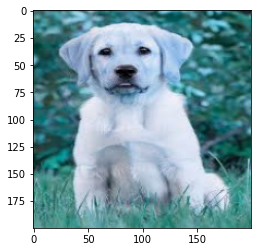

In [93]:
# Scaling

img_resize = cv2.resize(img, (200,200))
plt.imshow(img_resize)

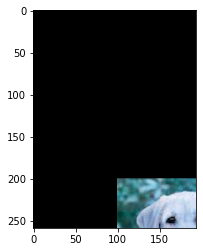

In [96]:
# Traslating

rows, col,channel = img.shape
M = np.float32([[1,0,100],[0,1,200]])
traslate_image = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(traslate_image)

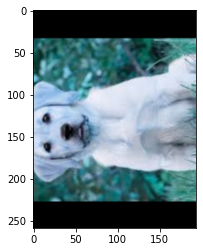

In [103]:
# Rotation

M = cv2.getRotationMatrix2D((cols/2, row/2),90,1)
rotated_image = cv2.warpAffine(img, M, (cols, rows))ss
plt.imshow(rotated_image)

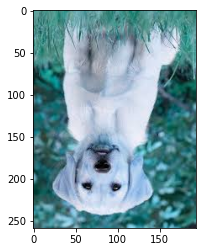

In [105]:
flipped_image = cv2.flip(img,0)
plt.imshow(flipped_image)

# Affine & Perspective Transformation

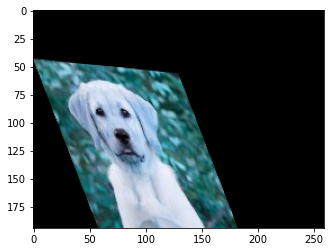

In [13]:
# Affine

cols,rows,channel = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[50,90],[150,100],[100,220]])


M = cv2.getAffineTransform(pts1, pts2)

affine_tfms_image = cv2.warpAffine(img,M, (cols, rows))

plt.imshow(affine_tfms_image)

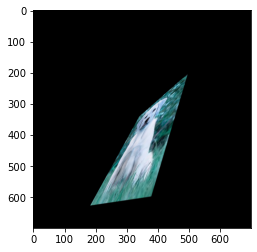

In [17]:
#  Perspective

pts1 = np.float32([[400, 400],[268,52],[28,387],[300,300]])
pts2 = np.float32([[0,0],[600,150],[0,1000],[1000,1000]])

M = cv2.getPerspectiveTransform(pts1, pts2)

prespective_image = cv2.warpPerspective(img,M,(700,700))

plt.imshow(prespective_image)

In [18]:
M

array([[ 3.08732696e-02, -8.83450483e-01,  3.41030885e+02],
       [-1.02247915e+00,  1.69901935e-01,  3.41030885e+02],
       [-1.55479403e-03, -1.49434690e-03,  1.00000000e+00]])

# Blurring & Sharpening Image

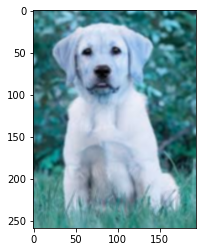

In [21]:
blur_image = cv2.blur(img,(3,3))
plt.imshow(blur_image)

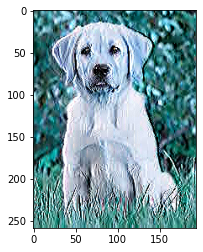

In [6]:
kernel = np.array([[0,0,0],[0,0,0],[-4,5,0]], np.float32) 


sharp_image = cv2.filter2D(img, -1, kernel)

plt.imshow(sharp_image)

# Image Pyramids & Blending 

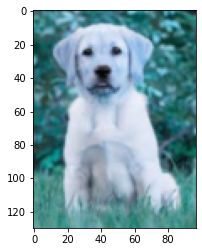

In [27]:
# Image Pyramids

lower_res = cv2.pyrDown(img)
plt.imshow(lower_res)

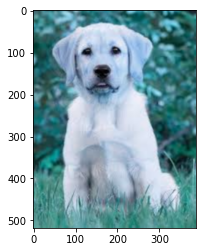

In [28]:
upper_res = cv2.pyrUp(img)
plt.imshow(upper_res)

In [8]:
forest = cv2.imread("forest.jpg")

In [9]:
# Image Blending

blended_img = cv2.addWeighted(img, 0.6, forest, 0.4, 0)
plt.imshow(blended_img)

error: OpenCV(4.3.0) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:669: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [32]:
print(img.shape)
print(forest.shape)

(259, 194, 3)
(400, 600, 3)


In [36]:
img_resized = cv2.resize(img, (600,400))
img_resized.shape

(400, 600, 3)

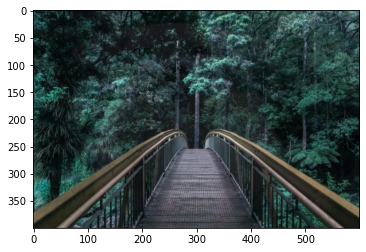

In [42]:
# Image Blending

blended_img = cv2.addWeighted(img_resized, 0.1, forest, 0.9, 0)
plt.imshow(blended_img)

# Bitwise Operators 

In [6]:
cv2.namedWindow('Tracking')

cv2.createTrackbar("LH", "Tracking",0,255,lambda x:x)
cv2.createTrackbar("LS", "Tracking",0,255,lambda x:x)
cv2.createTrackbar("LV", "Tracking",0,255,lambda x:x)
cv2.createTrackbar("UH", "Tracking",0,255,lambda x:x)
cv2.createTrackbar("US", "Tracking",0,255,lambda x:x)
cv2.createTrackbar("UV", "Tracking",0,255,lambda x:x)


while True:
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos("LH", 'Tracking')
    l_s = cv2.getTrackbarPos("LS", 'Tracking')
    l_v = cv2.getTrackbarPos("LV", 'Tracking')
    u_h = cv2.getTrackbarPos("UH", 'Tracking')
    u_s = cv2.getTrackbarPos("US", 'Tracking')
    u_v = cv2.getTrackbarPos("UV", 'Tracking')
    
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv, lower_range, upper_range)
    
    result = cv2.bitwise_or(img, img, mask=mask)
    
    cv2.imshow("Frame", img)
    cv2.imshow("mask", mask)
    cv2.imshow("Result", result)
    
    key = cv2.waitKey(1)
    
    if key == 27:
        break
        
    
cv2.destroyAllWindows()

while True:
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos("LH", 'Tracking')
    l_s = cv2.getTrackbarPos("LS", 'Tracking')
    l_v = cv2.getTrackbarPos("LV", 'Tracking')
    u_h = cv2.getTrackbarPos("UH", 'Tracking')
    u_s = cv2.getTrackbarPos("US", 'Tracking')
    u_v = cv2.getTrackbarPos("UV", 'Tracking')
    
    lower_range = np.array([l_h, l_s, l_v])
    upper_range = np.array([u_h, u_s, u_v])

    mask = cv2.inRange(hsv, lower_range, upper_range)
    
    result = cv2.bitwise_or(img, img, mask=mask)
    
    cv2.imshow("Frame", img)
    cv2.imshow("mask", mask)
    cv2.imshow("Result", result)
    
    key = cv2.waitKey(1)
    
    if key == 27:
        break
        
    
cv2.destroyAllWindows()

# Image Thresholding

In [78]:
img = cv2.imread('dog.jpg', 0)

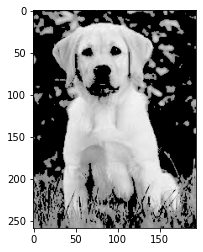

In [23]:
ret, thresh_img = cv2.threshold(img, 128,255,cv2.THRESH_TOZERO)
plt.imshow(thresh_img, cmap='gray')

In [24]:
ret

128.0

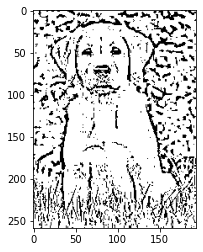

In [29]:
adaptive_thresh_img = cv2.adaptiveThreshold(img, 128, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.imshow(adaptive_thresh_img, cmap='gray')

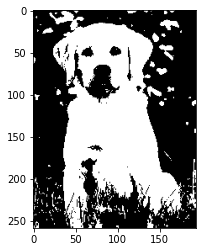

In [30]:
ret, otsu_thresh_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_thresh_img, cmap='gray')

# Image Gradients

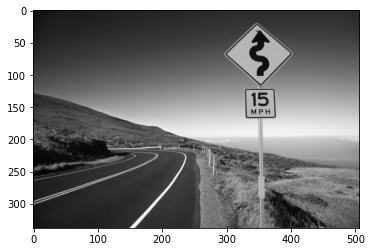

In [82]:
img = cv2.imread('roadsign.jpg', 0)
plt.imshow(img, cmap='gray')

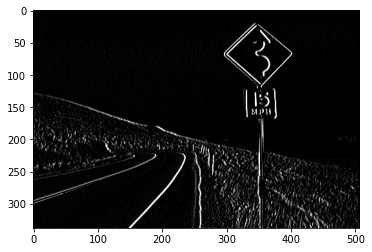

In [15]:
# Sobel X

kernel = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]], np.float32) 

sobel_x_image = cv2.filter2D(img, -1, kernel)

plt.imshow(sobel_x_image, cmap='gray')

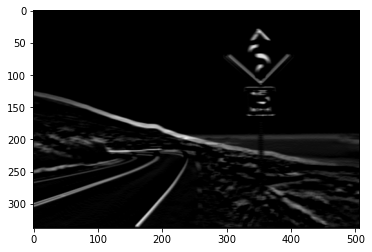

In [21]:
# Sobel Y

kernel = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]], np.float32) 

sobel_y__blue_image = cv2.blur(img,(7,7))

sobel_y_image = cv2.filter2D(sobel_y__blue_image, -1, kernel)

plt.imshow(sobel_y_image, cmap='gray')

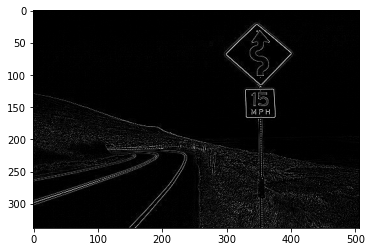

In [11]:
# Laplacian

kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]], np.float32) 

sobel_x_image = cv2.filter2D(img, -1, kernel)

plt.imshow(sobel_x_image, cmap='gray')

# Morphological Operations

In [17]:
# Erosion

kernel = np.ones((2, 2), np.uint8)
kernel

array([[1, 1],
       [1, 1]], dtype=uint8)

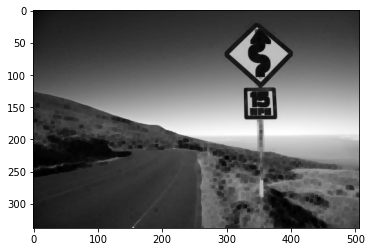

In [8]:
img_erosion = cv2.erode(img, kernel, iterations=1)
plt.imshow(img_erosion,cmap='gray')

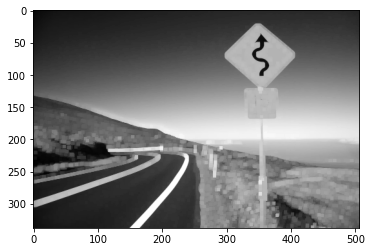

In [31]:
img_dialate = cv2.dilate(img, kernel, iterations=4)
plt.imshow(img_dialate,cmap='gray')

# Templet Matching

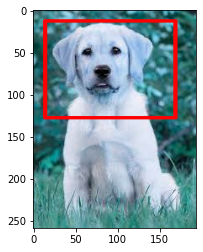

In [28]:
img = cv2.imread('dog.jpg')
face_img = cv2.imread('dogface.png')

h, w, channel = face_img.shape

result = cv2.matchTemplate(img, face_img, cv2.TM_CCOEFF_NORMED)

threshold = 0.9

location = np.where(res >= threshold)

for point in zip(*location[::-1]):
    
    cv2.rectangle(img, point, (point[0] + w, point[1] + h), (255, 0,0), 1)
    
plt.imshow(img)


In [29]:
print(location[::-1])

(array([13, 14, 15, 12, 13, 14, 15, 16, 12, 13, 14, 15, 16, 13, 14, 15],
      dtype=int64), array([11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14],
      dtype=int64))


# Canny Edge Detector & Hough Transform

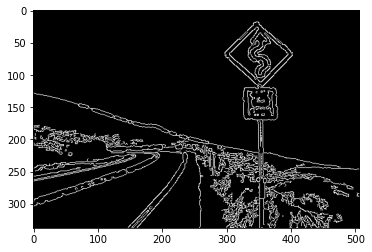

In [137]:
canny_img = cv2.Canny(img, 100,350)
plt.imshow(canny_img, cmap='gray')

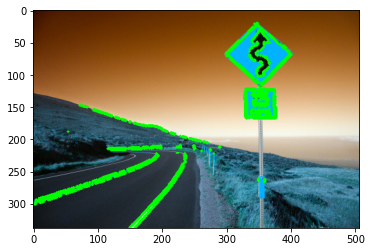

In [142]:
lines = cv2.HoughLinesP(canny_img, 1, np.pi/180, 100)
for x1,y1,x2,y2 in lines[0, :]:
    cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
plt.imshow(img)

# Contours

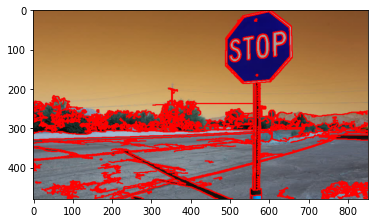

In [54]:
img = cv2.imread('road.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

canny = cv2.Canny(gray, 30, 200)

contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.drawContours(img, sorted_contours, -1, (255, 0,0 ), 2)

plt.imshow(img)

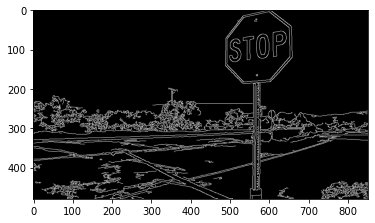

In [45]:
plt.imshow(canny, cmap='gray')

# Contours Part 2 

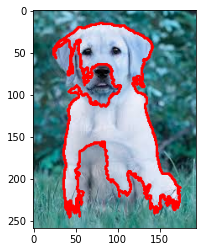

In [12]:
img = cv2.imread("dog.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 182, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.drawContours(img, sorted_contours, 0, (255, 0,0 ), 2)

plt.imshow(img)

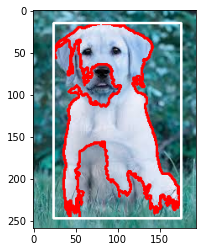

In [13]:
x, y, w, h = cv2.boundingRect(sorted_contours[0]) 
cv2.rectangle(img, (x, y), (x+w, y+h), (255,255,255), 2)
plt.imshow(img)

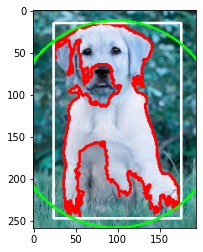

In [18]:
(x, y), radius = cv2.minEnclosingCircle(sorted_contours[0])
cv2.circle(img, (int(x), int(y)), int(radius), (0,255,0), 2)
plt.imshow(img)

In [16]:
radius, x, y

(123.73080444335938, 98.54102325439453, 135.4356231689453)

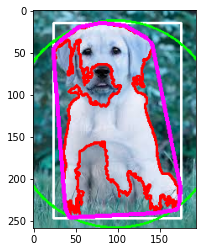

In [21]:
# Convex Hull

hull = cv2.convexHull(sorted_contours[0])

cv2.drawContours(img, [hull], -1, (255, 0, 255), 4)

plt.imshow(img)